In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
col_names = ["age", "M_sample", "M_mean", "M_sd", "F_sample", "F_mean", "F_sd"]
height = pd.read_excel("height_weight.xlsx", sheet_name=0, skiprows=4, usecols=range(7), names=col_names)
weight = pd.read_excel("height_weight.xlsx", sheet_name=0, skiprows=4, usecols=[0, 7, 8, 9, 10, 11, 12], names=col_names)

In [12]:
height.head()

,age,M_sample,M_mean,M_sd,F_sample,F_mean,F_sd
0,6,1111,116.62,4.88,1107,115.64,4.66
1,7,1109,122.44,5.04,1111,121.63,5.10
2,8,1125,128.33,5.18,1115,127.38,5.20
3,9,1112,133.50,5.46,1108,133.59,6.20
4,10,1116,138.80,5.88,1117,140.25,6.92


In [13]:
weight.head()

,age,M_sample,M_mean,M_sd,F_sample,F_mean,F_sd
0,6,1089,21.26,2.85,1084,20.79,2.82
1,7,1087,23.81,3.35,1081,23.21,3.14
2,8,1088,26.80,4.02,1093,26.32,4.17
3,9,1083,29.98,4.94,1091,29.81,5.01
4,10,1087,33.43,5.89,1096,33.92,6.33


In [14]:
# 不偏分散を求める
height.insert(4, "M_ud", np.sqrt((height["M_sample"] / (height["M_sample"] - 1)) * height["M_sd"] ** 2))
height.insert(8, "F_ud", np.sqrt((height["F_sample"] / (height["F_sample"] - 1)) * height["F_sd"] ** 2))

#信頼限界を求める
height.insert(5, "M_pm_under", height["M_mean"] - 2.262 * (height["M_ud"] / np.sqrt(height["M_sample"])))
height.insert(6, "M_pm_over", height["M_mean"] + 2.262 * (height["M_ud"] / np.sqrt(height["M_sample"])))
height.insert(11, "F_pm_under", height["F_mean"] - 2.262 * (height["F_ud"] / np.sqrt(height["F_sample"])))
height.insert(12, "F_pm_over", height["F_mean"] + 2.262 * (height["F_ud"] / np.sqrt(height["F_sample"])))

In [15]:
height.head()

,age,M_sample,M_mean,M_sd,M_ud,M_pm_under,M_pm_over,F_sample,F_mean,F_sd,F_ud,F_pm_under,F_pm_over
0,6,1111,116.62,4.88,4.882198,116.288677,116.951323,1107,115.64,4.66,4.662106,115.323043,115.956957
1,7,1109,122.44,5.04,5.042274,122.097506,122.782494,1111,121.63,5.10,5.102297,121.283741,121.976259
2,8,1125,128.33,5.18,5.182304,127.980506,128.679494,1115,127.38,5.20,5.202333,127.027586,127.732414
3,9,1112,133.50,5.46,5.462457,133.129466,133.870534,1108,133.59,6.20,6.202800,133.168487,134.011513
4,10,1116,138.80,5.88,5.882636,138.401680,139.198320,1117,140.25,6.92,6.923100,139.781439,140.718561


In [16]:
# 不偏分散を求める
weight.insert(4, "M_ud", (weight["M_sample"] / (weight["M_sample"] - 1)) * weight["M_sd"])
weight.insert(8, "F_ud", (weight["F_sample"] / (weight["F_sample"] - 1)) * weight["F_sd"])

#信頼限界を求める
weight.insert(5, "M_pm_under", weight["M_mean"] - 2.262 * (weight["M_ud"] / np.sqrt(weight["M_sample"])))
weight.insert(6, "M_pm_over", weight["M_mean"] + 2.262 * (weight["M_ud"] / np.sqrt(weight["M_sample"])))
weight.insert(11, "F_pm_under", weight["F_mean"] - 2.262 * (weight["F_ud"] / np.sqrt(weight["F_sample"])))
weight.insert(12, "F_pm_over", weight["F_mean"] + 2.262 * (weight["F_ud"] / np.sqrt(weight["F_sample"])))

In [17]:
weight.head()

,age,M_sample,M_mean,M_sd,M_ud,M_pm_under,M_pm_over,F_sample,F_mean,F_sd,F_ud,F_pm_under,F_pm_over
0,6,1089,21.26,2.85,2.852619,21.064466,21.455534,1084,20.79,2.82,2.822604,20.596078,20.983922
1,7,1087,23.81,3.35,3.353085,23.579950,24.040050,1081,23.21,3.14,3.142907,22.993772,23.426228
2,8,1088,26.80,4.02,4.023698,26.524067,27.075933,1093,26.32,4.17,4.173819,26.034428,26.605572
3,9,1083,29.98,4.94,4.944566,29.640135,30.319865,1091,29.81,5.01,5.014596,29.466587,30.153413
4,10,1087,33.43,5.89,5.895424,33.025524,33.834476,1096,33.92,6.33,6.335781,33.487100,34.352900


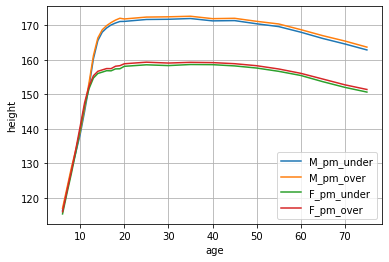

In [18]:
height["age"].iloc[14:] = height["age"].iloc[14:].str[:2]
plt.plot(height["age"], height["M_pm_under"], label="M_pm_under")
plt.plot(height["age"], height["M_pm_over"], label="M_pm_over")
plt.plot(height["age"], height["F_pm_under"], label="F_pm_under")
plt.plot(height["age"], height["F_pm_over"], label="F_pm_over")
plt.xlabel("age")
plt.ylabel("height")
plt.legend()
plt.grid()
plt.show()

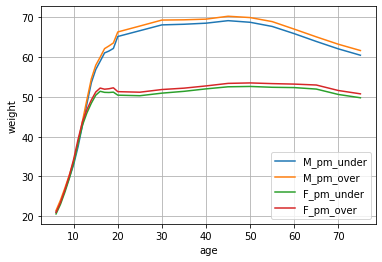

In [14]:
weight["age"].iloc[14:] = weight["age"].iloc[14:].str[:2]
plt.plot(weight["age"], weight["M_pm_under"], label="M_pm_under")
plt.plot(weight["age"], weight["M_pm_over"], label="M_pm_over")
plt.plot(weight["age"], weight["F_pm_under"], label="F_pm_under")
plt.plot(weight["age"], weight["F_pm_over"], label="F_pm_over")
plt.xlabel("age")
plt.ylabel("weight")
plt.legend()
plt.grid()
plt.show()